# Linear Regression with Python

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Check out the data

In [2]:
df=pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

In [6]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

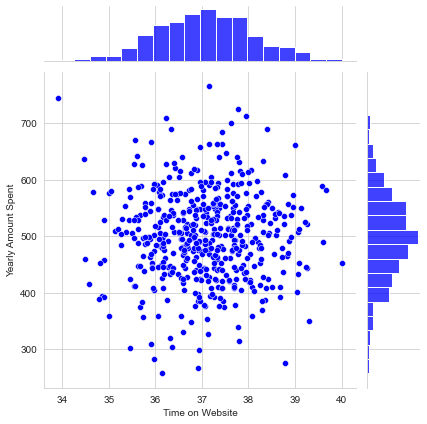

In [37]:
#More time on site, more money spent
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df, color="blue")

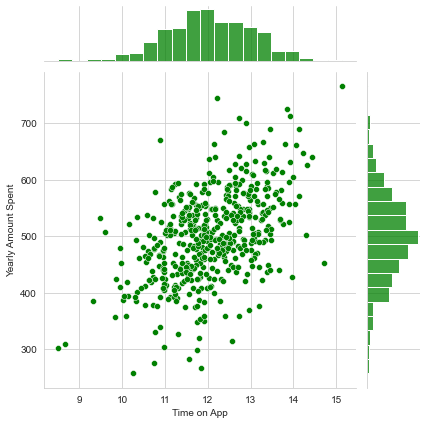

In [38]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df,color="green")

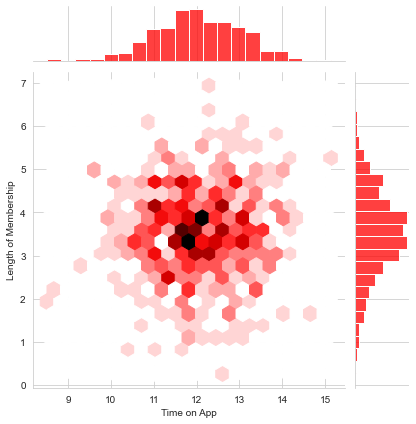

In [36]:
sns.jointplot(x="Time on App",y="Length of Membership",kind="hex",data=df,color="red")

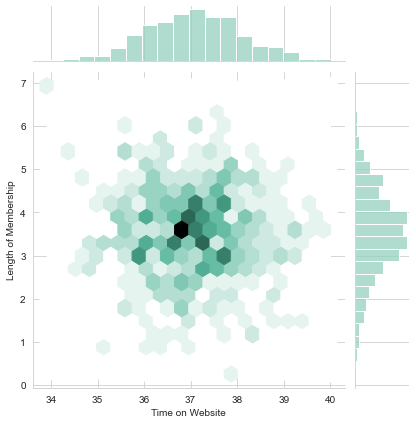

In [10]:
sns.jointplot(x="Time on Website",y="Length of Membership",kind="hex",data=df)

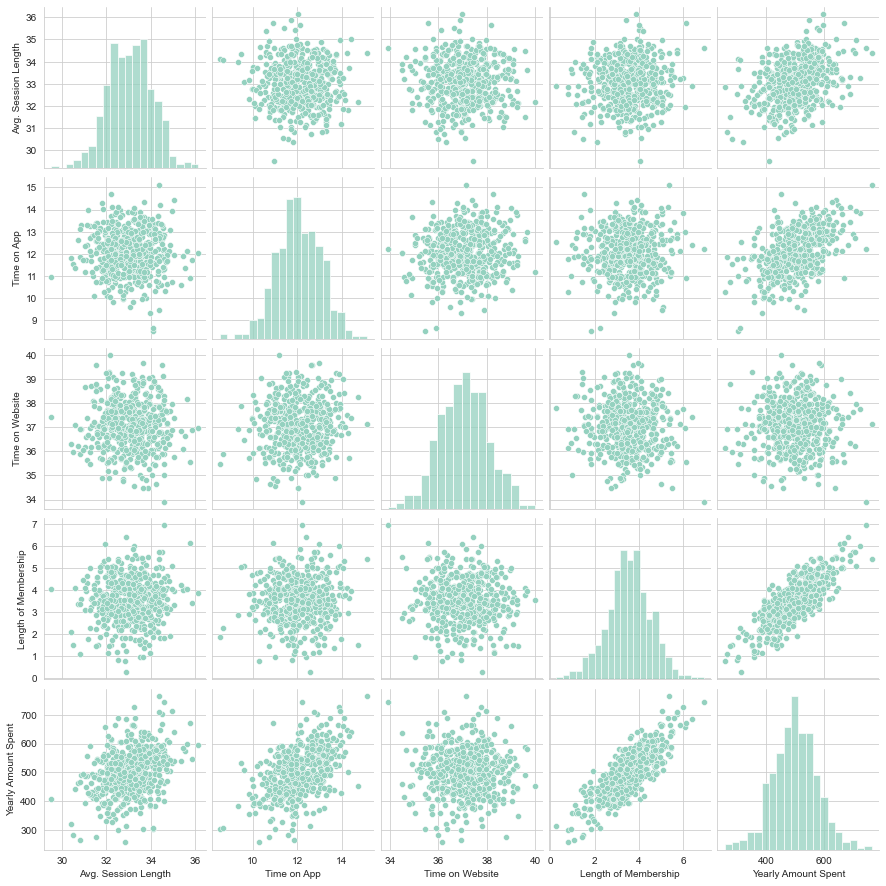

In [33]:
sns.pairplot(df)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

In [12]:
#Length of membership

Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

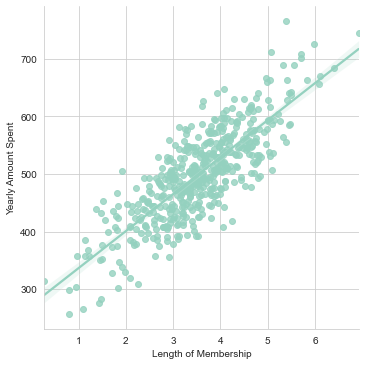

In [35]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df)

# Training and Testing Data

In [14]:
y=df["Yearly Amount Spent"]

In [15]:
x=df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Training the model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [21]:
#The coefficients
print("coefficients:\n", lm.coef_)

coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [22]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of \$25.98 total dollars spent
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of \$38.59 total dollars spent
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of      \$0.19 total dollars spent
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of \$61.28 total dollars spent


# Predicting Test Data

In [23]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted_y')

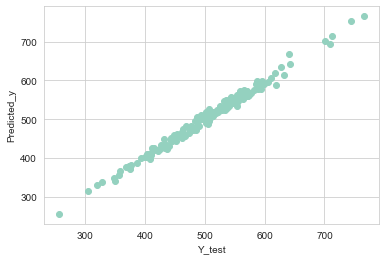

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel("Y_test")
plt.ylabel("Predicted_y")

# Regression Evaluation Metrics

In [25]:
from sklearn import metrics

In [26]:
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:", metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097451
RMSE: 8.933815066978637


Residuals

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

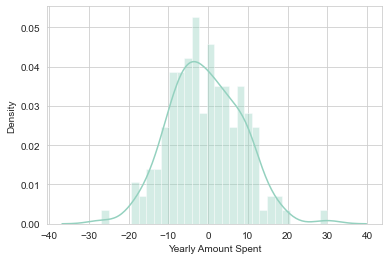

In [27]:
sns.distplot((y_test-predictions),bins=30)